# Home LLC - Assignment

The data in dataset is collected from FRED.

Fllowing papers used to gather data:

Articles refered -
https://www.forbes.com/siteS /forbesbizcouncil/2021/10/25/us-housing-supply-obstacles-and-opportunities/?sh=49dfdc1740dc
    
https://pvsbuilders.com/economic-factors-affecting-housing-market/
    
Https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp
    
https://www.economicshelp.org/blog/377/housing/factors-that-affect-the-housing-market/
    
https://www.jstor.org/stable/29783816
    
    
Research Papers refered -
https://www.atlantis-press.com/article/25841966.pd

    These research papers are extremly informative and covers lot of details regarding the micro economic & macro economics involved in real estate market so i would recommend you all to go through it once

Note:
    This dataset is updated over a period of time and include the following
    
    * Macro Economic factors: with quarterly & monthly frequencies
    * Micro Economic Factors: such as house type,age, location, size, facilities,view, region etc.

# Data Preprocessing & visualization

In [1]:
import numpy as np  #linear algebra
import pandas as pd # data preprocessing

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation & modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedKFold,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels .api as sm

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
%matplotlib inline

# Loading Data Set

In [2]:
df = pd.read_csv("Annual_Macroeconomic_Factors.csv")
df

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,01-01-1975,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,01-01-1976,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,01-01-1977,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,01-01-1978,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,01-01-1979,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672
5,01-01-1980,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584
6,01-01-1981,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891
7,01-01-1982,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156
8,01-01-1983,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714
9,01-01-1984,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062


In [3]:
df.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,01-01-1975,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,01-01-1976,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,01-01-1977,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,01-01-1978,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,01-01-1979,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672


# Correlation matrix for influencing factors



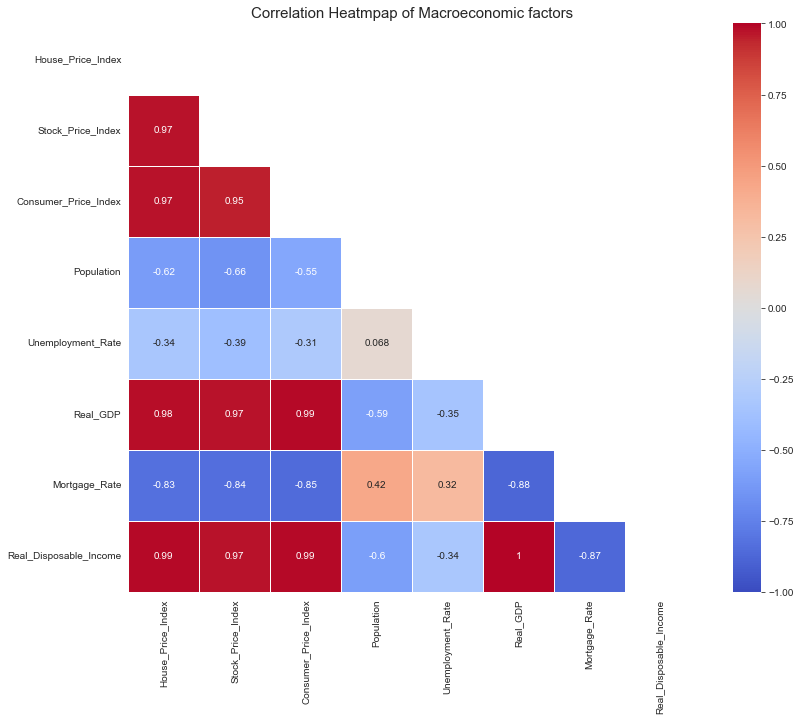

In [4]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]  = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(12,10))
    ax=sns.heatmap(df_corr,mask=mask,vmax=1,vmin=-1,linewidths=.5,square=True,cmap='coolwarm',annot=True)
    plt.title('Correlation Heatmpap of Macroeconomic factors', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

observations:

        1.House price index has a very strong positive linear relationship with population,producer price index,involved
        with Residential construction 
    
        2.It also have strong negative linear relationship with mortgage rate
    
        3.But we can note,that population has negative relationship with mortgage_rate

# Data Modelling

Normalizing to scale the features(feature scaling)

In [5]:
df = df.copy().reset_index()
df = df.drop(columns=['Date'])

In [6]:
scaler = MinMaxScaler()
n_macro=pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)
n_macro.head(4)

,index,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,0.000000,0.000000,0.000000,0.000000,0.683960,0.794484,0.000000,0.445010,0.000000
1,0.021739,0.009596,0.005856,0.014237,0.655761,0.670346,0.022088,0.431762,0.015471
2,0.043478,0.026711,0.005336,0.031276,0.699553,0.562759,0.042066,0.430253,0.030801
3,0.065217,0.049019,0.005346,0.052574,0.741965,0.397242,0.067085,0.488463,0.056127


# Splitting the Dataset

In [7]:
X_train, X_test,y_train,y_test = train_test_split(n_macro.drop(columns="House_Price_Index",axis=1),n_macro["House_Price_Index"],test_size=0.30,random_state = 42)

# Perfoming & Evaluating Various Regression models

In [8]:
#define evaluation method
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

#defining the model
model1 = Lasso(alpha=1.0)
scores1 = cross_val_score(model1,X_train,y_train, scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
score1 = np.absolute(scores1)

print('Mean MAE: %.3f (%.3f)'%(np.mean(scores1),np.std(scores1)))

Mean MAE: -0.250 (0.079)


In [9]:
model2 = Ridge(alpha=1.0)
scores2 = cross_val_score(model2,X_train,y_train,scoring='neg_mean_absolute_error',cv=cv,n_jobs = -1)
scores2 = np.absolute(scores2)
print('Mean MAE: %.3f(%.3f)' %(np.mean(scores2),np.std(scores2)))

Mean MAE: 0.046(0.019)


In [10]:
model3 = BayesianRidge()
scores3 = cross_val_score(model3,X_train,y_train, scoring = 'neg_mean_absolute_error',cv=cv,n_jobs = -1)
scores3 = np.absolute(scores3)
print('Mean MAE: %.3f(%.3f)'%(np.mean(scores3),np.std(scores3)))

Mean MAE: 0.034(0.018)


In [11]:
model4 = LinearRegression()
scores4 = cross_val_score(model4,X_train,y_train,scoring='neg_mean_absolute_error',cv=cv,n_jobs = -1)
scores4 = np.absolute(scores4)
print('Mean MAE: %.3f (%.3f)' %(np.mean(scores4),np.std(scores4)))

Mean MAE: 0.029 (0.018)


In [12]:
model5 = ElasticNet()
scores5 = cross_val_score(model5,X_train,y_train,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)
scores5=np.absolute(scores5)
print('Mean MAE: %.3f(%.3f)'%(np.mean(scores5),np.std(scores5)))

Mean MAE: 0.250(0.079)


Here BayesianRidge & linearRegression had the best score. Choose BiasianRidge for further optimization

# Hyper parameter selection

In [13]:
clf = GridSearchCV(BayesianRidge(),{
    'alpha_1':list(range(0,10,1)),
     'alpha_2':list(range(0,10,1)),
     'lambda_1':list(range(0,10,1)),
     'lambda_2':list(range(0,10,1))
},cv=5,return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'alpha_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [14]:
param_df = pd.DataFrame(clf.cv_results_)
param_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008324,0.010178,0.004483,0.006393,0,0,0,0,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.993075,0.953761,0.975131,0.932811,0.968074,0.964570,0.020307,919
1,0.001410,0.001214,0.000800,0.000980,0,0,0,1,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.993485,0.944774,0.977857,0.937185,0.992484,0.969157,0.023784,85
2,0.003124,0.006247,0.000000,0.000000,0,0,0,2,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.993824,0.940259,0.978037,0.939689,0.994832,0.969328,0.024697,42
3,0.003125,0.006249,0.000000,0.000000,0,0,0,3,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.994008,0.937004,0.978042,0.941352,0.995567,0.969195,0.025302,77
4,0.003125,0.006250,0.000000,0.000000,0,0,0,4,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.994126,0.934419,0.978010,0.942550,0.995890,0.968999,0.025811,206


In [15]:
max_test_score = np.max(param_df["mean_test_score"])
print(max_test_score)

0.9703891299969356


In [16]:
param_df[param_df['mean_test_score']==max_test_score]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9000,0.003125,0.00625,0.003125,0.006249,9,0,0,0,"{'alpha_1': 9, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.994049,0.943396,0.978016,0.940944,0.995541,0.970389,0.023859,1


In [17]:
print('''Hyper Parameters are:
         alpha_1: {}
         alpha_2:{}
         lambda_1: {}
         lambda_2: {}'''.format(param_df["param_alpha_1"][9000],param_df["param_alpha_2"][9000],param_df["param_lambda_1"][9000],param_df["param_lambda_1"][9000],param_df["param_lambda_2"][9000]))

Hyper Parameters are:
         alpha_1: 9
         alpha_2:0
         lambda_1: 0
         lambda_2: 0


# model Fitting

In [18]:
#model defining & fitting
model_br = BayesianRidge(alpha_1=9,alpha_2=0,lambda_1 = 0,lambda_2=0)
fit_data = model_br.fit(X_train,y_train)

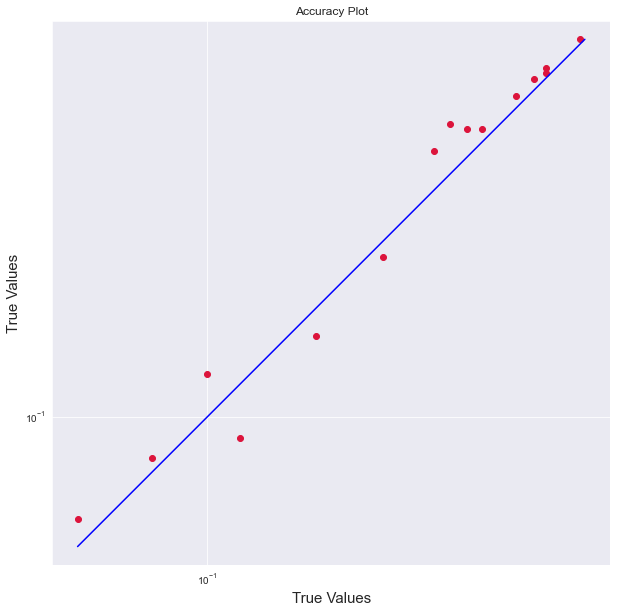

In [19]:
# prediction
prediction = fit_data.predict(X_test)

#plotting both the curves simultaneously
plt.figure(figsize = (10,10))
plt.scatter(y_test,prediction,c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction),max(y_test))
p2 = min(min(prediction),min(y_test))
plt.plot([p1,p2],[p1,p2], 'b-')
plt.xlabel('True Values',fontsize = 15)
plt.ylabel('True Values',fontsize = 15)
plt.title('Accuracy Plot')
plt.axis('equal')
plt.show()

In [20]:
rmse = np.sqrt(mean_squared_error(y_test,prediction))
print('RMSE:',rmse)
r2 = r2_score(y_test,prediction)
print('R squared:',r2)

RMSE: 0.048740327651074354
R squared: 0.9542325572471182


# Ordinary least squares(OLS) using stats model:

In [21]:
result = sm.OLS(y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:      House_Price_Index   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1068.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    1.05e-28
Time:                        19:08:49   Log-Likelihood:                          72.249
No. Observations:                  32   AIC:                                     -128.5
Df Residuals:                      24   BIC:                                     -116.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

This model also shows that the 99.7% (r squares =  0.997) of the variablity of house price index can be explained by independent features